##Foggy-CycleGAN

reference Phd dissertation: https://github.com/ghaiszaher/Foggy-CycleGAN


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')   # connect to gdrive

# Change working directory to be current folder
import os
os.chdir('/content/gdrive/My Drive/Foggy-CycleGAN')


Mounted at /content/gdrive


In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/Foggy-CycleGAN/lib')


In [ ]:
class MyClass:
    def my_method(self):
        if self.data_format == "channels_last":
            from lib.models import ModelsBuilder


In [ ]:

import tensorflow as tf
from lib.models import ModelsBuilder
from lib.plot import plot_clear2fog_intensity
import matplotlib.pyplot as plt

# 构建模型
models_builder = ModelsBuilder()
generator_clear2fog = models_builder.build_generator()

# 加载权重
generator_clear2fog.load_weights('./weights/generator_clear2fog.h5')



In [ ]:
# # check the model architecture
# generator_clear2fog.summary()


# # Visualize model architecture
# tf.keras.utils.plot_model(generator_clear2fog, to_file='generator_clear2fog.png', show_shapes=True, show_layer_names=True)

# # Display the plot with larger size
# image = plt.imread('generator_clear2fog.png')
# plt.figure(figsize=(40, 40))  # Adjust the figsize as per your preference
# plt.imshow(image)
# plt.axis('off')
# plt.show()


1/1 [==============================] - 0s 144ms/step


1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 139ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 142ms/step


1/1 [==============================] - 0s 143ms/step


1/1 [==============================] - 0s 146ms/step
Execution Time: 2.8259732723236084 seconds


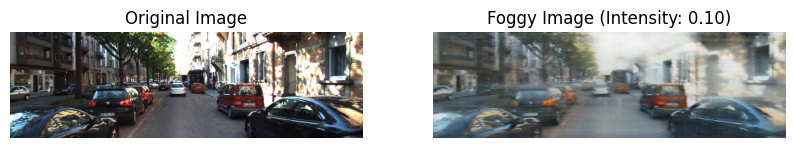

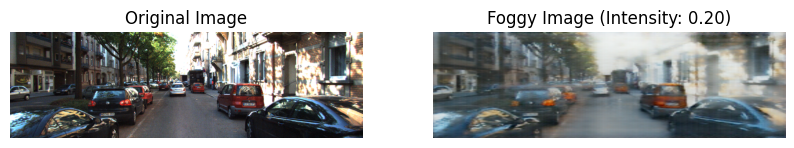

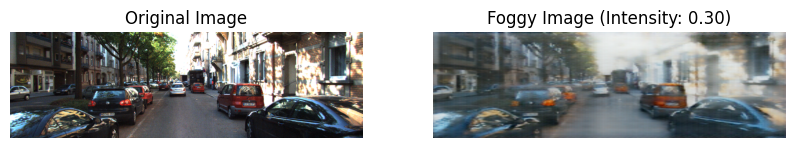

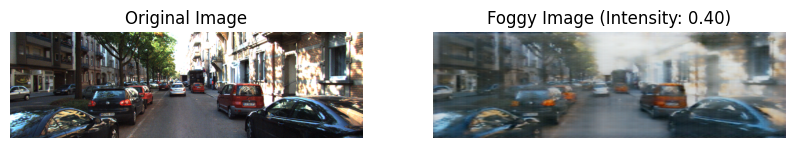

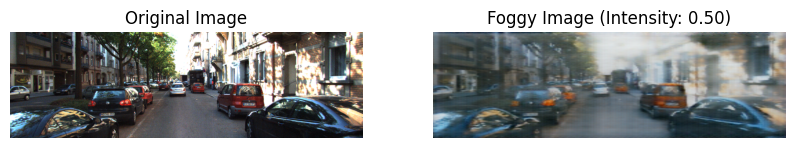

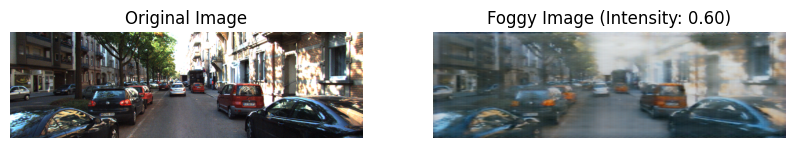

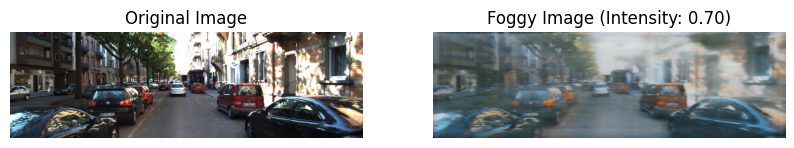

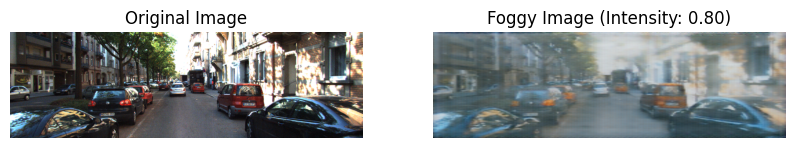

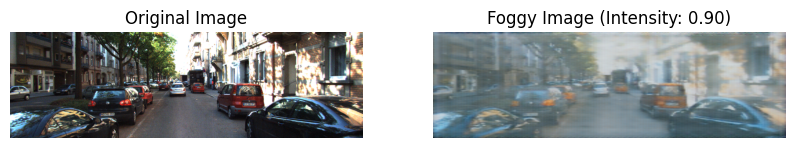

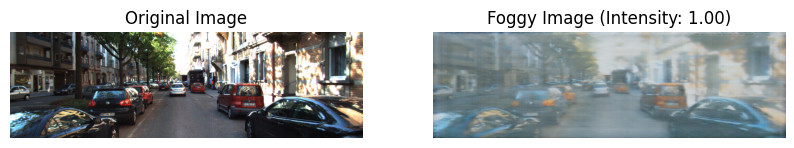

In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
import os
import time

# Record start time
start_time = time.time()

# Prepare clear image
file_path = './sample_images/005661.png'  # Replace with your clear image path
image_clear = tf.io.decode_png(tf.io.read_file(file_path), channels=3)

# Get original image dimensions
original_height, original_width, _ = image_clear.shape

# Preprocess image, resize it to the model's input size [256, 256], and normalize to [0, 1]
image_clear_resized = tf.image.resize(image_clear, [256, 256]) / 255.0

# Define fog intensity range and step
start_intensity = 0.1
end_intensity = 1
step = 0.1

# Generate images with different fog intensities and visualize
intensity_path = './intensity/'
if not os.path.exists(intensity_path):
    os.makedirs(intensity_path)

for intensity in tf.range(start_intensity, end_intensity + step, step):
    # Input the resized clear image into the generator model to generate foggy image
    # Dynamically generate a tensor representing the intensity value and pass it to the model
    intensity_tensor = tf.ones((1, 1)) * intensity
    foggy_image_resized = generator_clear2fog.predict([tf.expand_dims(image_clear_resized, axis=0), intensity_tensor])

    # Resize foggy image back to original image size
    foggy_image = tf.image.resize(foggy_image_resized, [original_height, original_width])

    # Visualize original and foggy images
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_clear)
    plt.title('Original Image')
    plt.axis('off')

    # Foggy image
    plt.subplot(1, 2, 2)
    plt.imshow(tf.squeeze(foggy_image, axis=0))
    plt.title('Foggy Image (Intensity: {:.2f})'.format(intensity))
    plt.axis('off')

    # Resize foggy image to match original image size
    foggy_image_original_size = tf.image.resize(foggy_image, [original_height, original_width])


# Record end time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")


1/1 [==============================] - 0s 143ms/step


1/1 [==============================] - 0s 138ms/step


1/1 [==============================] - 0s 139ms/step


1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 136ms/step


1/1 [==============================] - 0s 138ms/step
Execution Time: 2.192131280899048 seconds


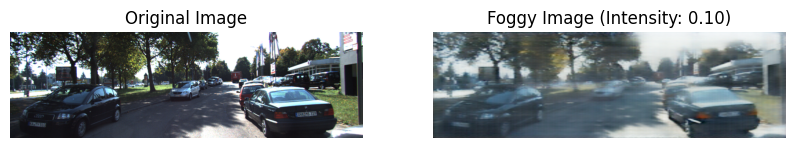

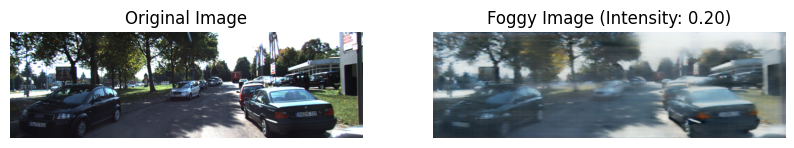

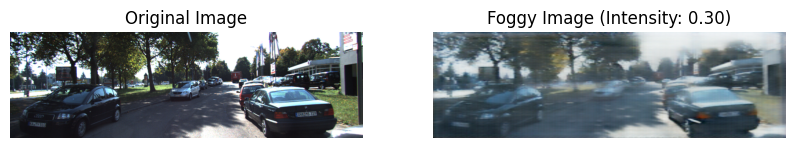

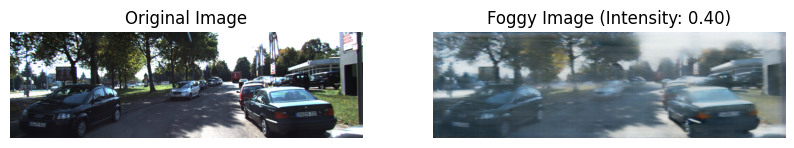

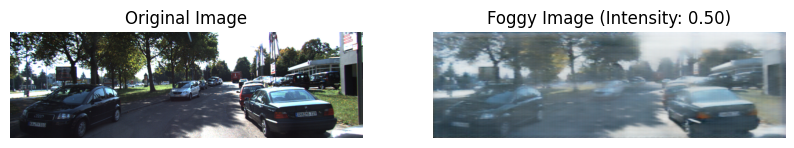

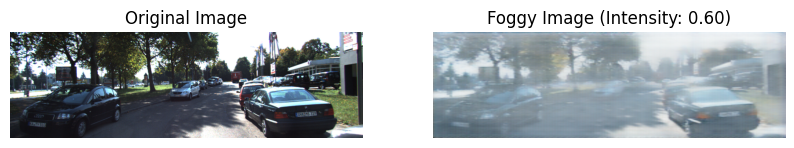

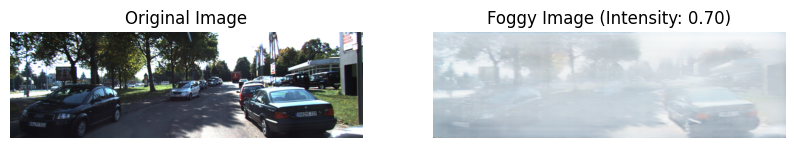

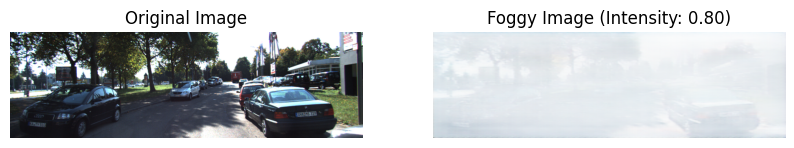

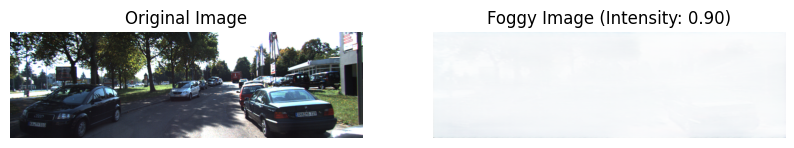

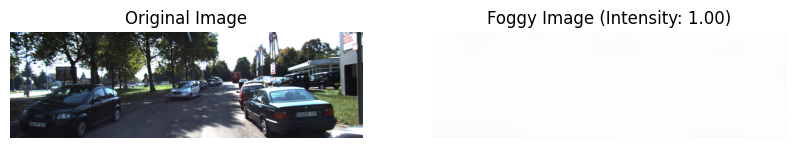

In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
import os
import time

# Record start time
start_time = time.time()

# Prepare clear image
file_path = './sample_images/005530.png'  # Replace with your clear image path
image_clear = tf.io.decode_png(tf.io.read_file(file_path), channels=3)

# Get original image dimensions
original_height, original_width, _ = image_clear.shape

# Preprocess image, resize it to the model's input size [256, 256], and normalize to [0, 1]
image_clear_resized = tf.image.resize(image_clear, [256, 256]) / 255.0

# Define fog intensity range and step
start_intensity = 0.1
end_intensity = 1
step = 0.1

# Generate images with different fog intensities and visualize
intensity_path = './intensity/'
if not os.path.exists(intensity_path):
    os.makedirs(intensity_path)

for intensity in tf.range(start_intensity, end_intensity + step, step):
    # Input the resized clear image into the generator model to generate foggy image
    # Dynamically generate a tensor representing the intensity value and pass it to the model
    intensity_tensor = tf.ones((1, 1)) * intensity
    foggy_image_resized = generator_clear2fog.predict([tf.expand_dims(image_clear_resized, axis=0), intensity_tensor])

    # Resize foggy image back to original image size
    foggy_image = tf.image.resize(foggy_image_resized, [original_height, original_width])

    # Visualize original and foggy images
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_clear)
    plt.title('Original Image')
    plt.axis('off')

    # Foggy image
    plt.subplot(1, 2, 2)
    plt.imshow(tf.squeeze(foggy_image, axis=0))
    plt.title('Foggy Image (Intensity: {:.2f})'.format(intensity))
    plt.axis('off')

    # Resize foggy image to match original image size
    foggy_image_original_size = tf.image.resize(foggy_image, [original_height, original_width])


# Record end time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

#实现加雾

intensity = 0.1， 0.3， 0.5， 0.7，分别表示 小，中，大，特大雾

- 从当前路径下的文件夹temp中按文件名增序依次读入png文件。(注意每次读入一张png图片)
- 读入第i张图片时（i=1,2，...）, 计算k和intensity值: if i%4 != 0, k = i%4, intensity = 0.1*(2*k-1); if i%4 == 0, intensity = 0.7
- 把这张已经添加雾的图像保存到当前路径下的文件夹2000_augmented\fog_2\fog_intensity_{intensity}



In [ ]:
# import os

# folder_path = './5000_6999'

# # 获取文件列表
# file_list = os.listdir(folder_path)

# # 统计文件数量
# file_count = len(file_list)
# print("文件夹中文件数量:", file_count)

# # 检查是否有重复的文件
# if len(set(file_list)) == len(file_list):
#     print("文件夹中没有重复的文件。")
# else:
#     print("文件夹中存在重复的文件。")



In [ ]:
# import glob
# import os
# import tensorflow as tf

# # Get file paths for all PNG images in the 'temp' folder sorted by filename
# file_paths = sorted(glob.glob('./temp/*.png'))

# # Define fog intensity path
# intensity_path = './2000_augmented/fog_2/'

# # Iterate through the images
# for i, file_path in enumerate(file_paths, start=1):
#     # Read the image
#     image_clear = tf.io.decode_png(tf.io.read_file(file_path), channels=3)

#     # Calculate k and intensity values
#     if i % 4 != 0:
#         k = i % 4
#         intensity = 0.1 * (2 * k - 1)
#     elif i % 4 == 0:
#         intensity = 0.7

#     # Prepare clear image
#     original_height, original_width, _ = image_clear.shape
#     image_clear_resized = tf.image.resize(image_clear, [256, 256]) / 255.0

#     # Input the resized clear image into the generator model to generate foggy image
#     intensity_tensor = tf.ones((1, 1)) * intensity
#     foggy_image_resized = generator_clear2fog.predict([tf.expand_dims(image_clear_resized, axis=0), intensity_tensor])

#     # Resize foggy image back to original image size
#     foggy_image = tf.image.resize(foggy_image_resized, [original_height, original_width])

#     # Create folder for each intensity value if it does not exist
#     intensity_folder = os.path.join(intensity_path, f'fog_intensity_{intensity:.1f}')  # 控制小数点后一位
#     if not os.path.exists(intensity_folder):
#         os.makedirs(intensity_folder)

#     # Save foggy image in corresponding intensity folder
#     filename = os.path.basename(file_path)
#     save_path = os.path.join(intensity_folder, filename)
#     tf.keras.preprocessing.image.save_img(save_path, tf.squeeze(foggy_image, axis=0))

#     print(f"Processed {file_path} and saved foggy image with intensity {intensity}.")

# print("All images processed and saved successfully.")


In [ ]:
# import os
# import zipfile

# # 定义要压缩的文件夹路径和压缩后的 zip 文件名
# folder_to_zip = './2000_augmented/fog_2'
# zip_file_name = 'fog_2.zip'

# # 创建一个 ZipFile 对象，用于写入 zip 文件
# with zipfile.ZipFile(zip_file_name, 'w') as zipf:
#     # 遍历文件夹中的所有文件和子文件夹
#     for root, dirs, files in os.walk(folder_to_zip):
#         for file in files:
#             # 构建文件的完整路径
#             file_path = os.path.join(root, file)
#             # 将文件添加到 zip 文件中，使用相对路径保存
#             zipf.write(file_path, os.path.relpath(file_path, folder_to_zip))

# print(f'已将文件夹 {folder_to_zip} 压缩为 {zip_file_name}')
